In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("../data/superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Checking the count of columns & rows

In [2]:
df.shape

(9994, 21)

## Displaying the columns

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Showcasing mainly for data types of each columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Checking for null values

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Converting into datetime onject

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


## verifying our converted columns

In [7]:
df[['Order Date', 'Ship Date']].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

## checking for duplicates

In [8]:
df.duplicated().sum()


np.int64(0)

## creating new column called shipping days to ensure customer satisfaction

In [9]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping_Days'].describe()


count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping_Days, dtype: float64

## creating a monthly sales trend

* observation - Overall there is a standard upward trend from 2014 to 2017 but still there's fluctuations.
* Reason - Growth in customer base and some seasonal demand spikes
* Business Action - Staffing and stocks should be well increased and maintained during peak months and holiday's to expand and increase the revenue.

C:\Users\sanja\AppData\Local\Temp\ipykernel_460\3469268748.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


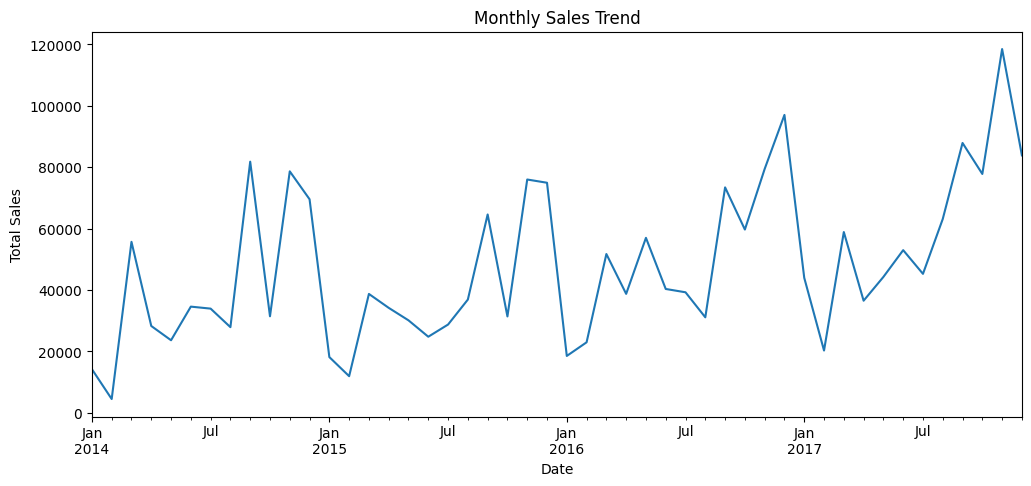

In [10]:
monthly_sales = (
    df
    .set_index('Order Date')
    .resample('M')['Sales']
    .sum()
)

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


## creating a chart for sales and profit by category

* Observation - Technology and office supplies has more profits where furniture has very low profit.
* Reason - Likely due to high discounts, shipping costs because the sales are high as we can see.
* Business Action - Need to discuss strategies for discounts and optimize logistics to improve profit.

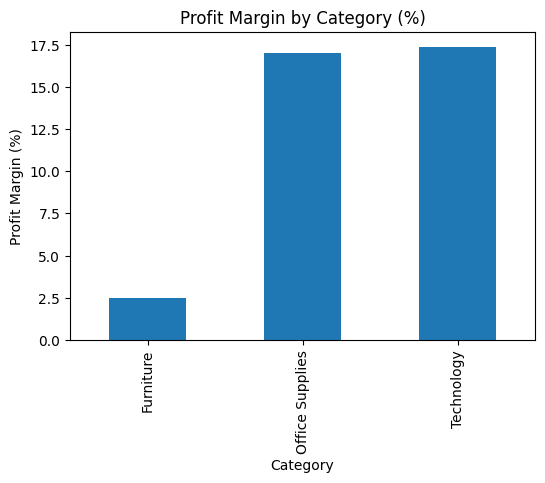

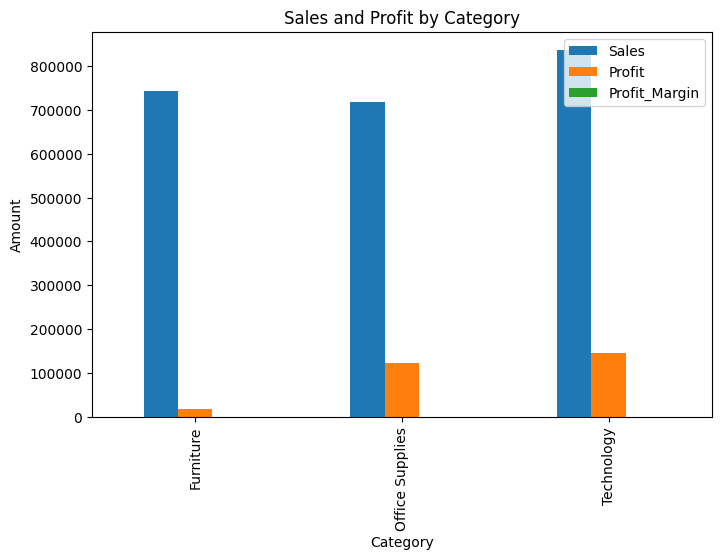

In [12]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum()
category_summary['Profit_Margin'] = (
    category_summary['Profit'] / category_summary['Sales']
) * 100

category_summary[['Profit_Margin']].plot(
    kind='bar', figsize=(6,4), legend=False
)
plt.title("Profit Margin by Category (%)")
plt.ylabel("Profit Margin (%)")
plt.show()


category_summary.plot(kind='bar', figsize=(8,5))
plt.title("Sales and Profit by Category")
plt.ylabel("Amount")
plt.show()


## creating region wise performance chart

* Observation - West and east region has more profits where south followed by central has low profit.
* Reason - Difference in customer demand and shipping costs because each region has different environments and its own needs.
* Business Action - Need to focus expanding the market in high-profit zones while maintaining the efficiency in other regions.


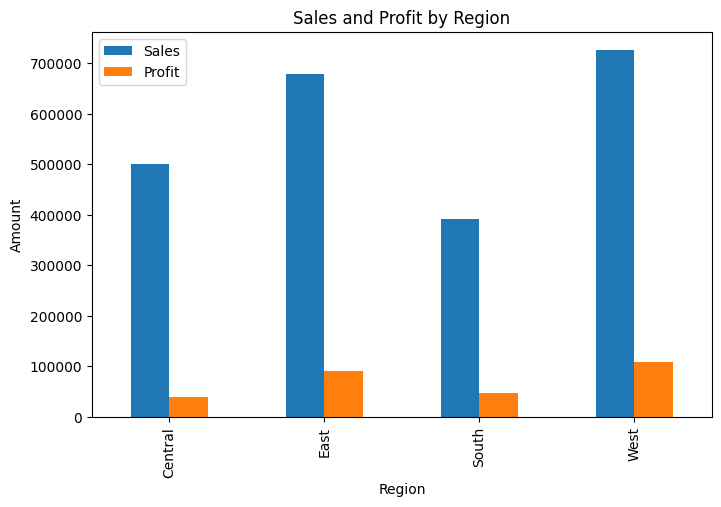

In [ ]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum()

region_summary.plot(kind='bar', figsize=(8,5))
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.show()


## creating discount vs profit chart

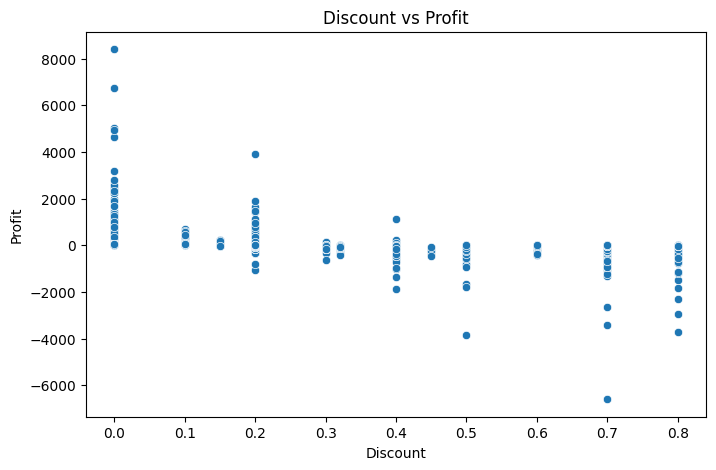

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


##  Conclusion :

 The analysis revealed a steady growth in sales over time with seasonal fluctuations. Technology emerged as the most profitable category, while Furniture showed high sales but poor profitability, likely due to heavy discounting and shipping costs. Regional differences indicate opportunities for targeted business strategies. Overall, discounting has a strong negative impact on profit margins, suggesting a need for optimized pricing strategies.